<a href="https://colab.research.google.com/github/JanisseVera/SIS420_JMTV/blob/main/Laberinto_Serpiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Cycle:  1 / 4500
Training Cycle:  2 / 4500
Training Cycle:  3 / 4500
Training Cycle:  4 / 4500
Training Cycle:  5 / 4500
Training Cycle:  6 / 4500
Training Cycle:  7 / 4500
Training Cycle:  8 / 4500
Training Cycle:  9 / 4500
Training Cycle:  10 / 4500
Training Cycle:  11 / 4500
Training Cycle:  12 / 4500
Training Cycle:  13 / 4500
Training Cycle:  14 / 4500
Training Cycle:  15 / 4500
Training Cycle:  16 / 4500
Training Cycle:  17 / 4500
Training Cycle:  18 / 4500
Training Cycle:  19 / 4500
Training Cycle:  20 / 4500
Training Cycle:  21 / 4500
Training Cycle:  22 / 4500
Training Cycle:  23 / 4500
Training Cycle:  24 / 4500
Training Cycle:  25 / 4500
Training Cycle:  26 / 4500
Training Cycle:  27 / 4500
Training Cycle:  28 / 4500
Training Cycle:  29 / 4500
Training Cycle:  30 / 4500
Training Cycle:  31 / 4500
Training Cycle:  32 / 4500
Training Cycle:  33 / 4500
Training Cycle:  34 / 4500
Training Cycle:  35 / 4500
Training Cycle:  36 / 4500
Training Cycle:  37 / 4500
Training C

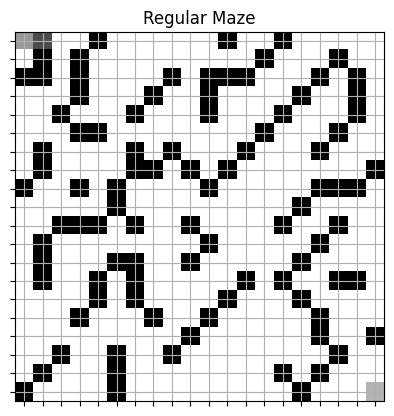

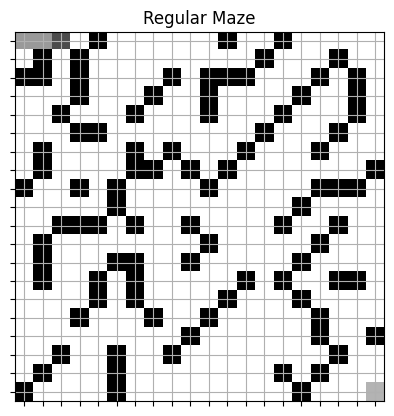

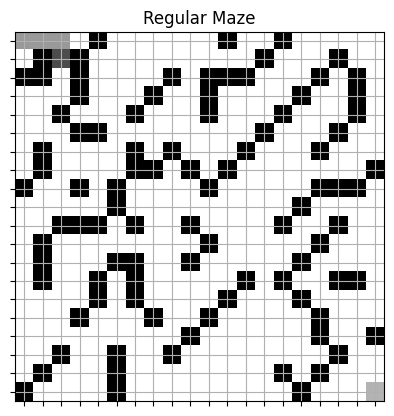

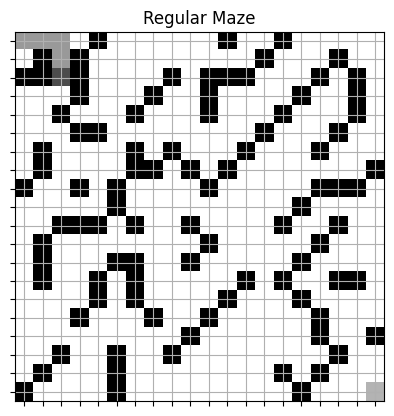

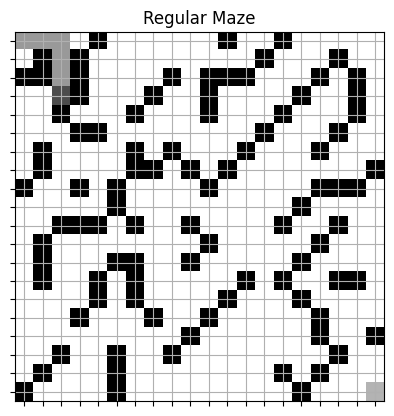

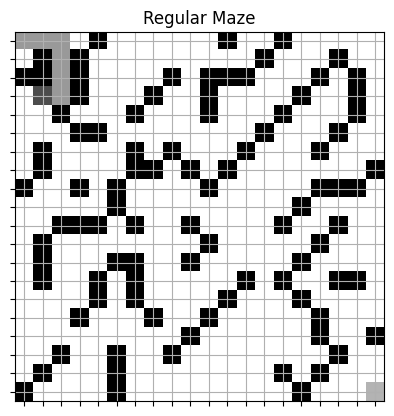

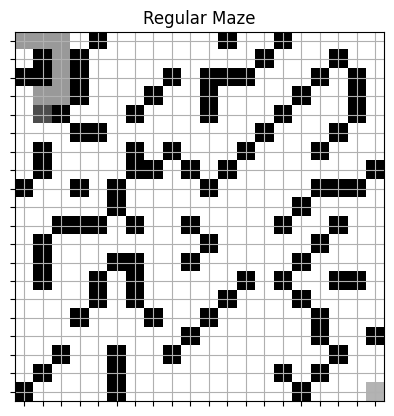

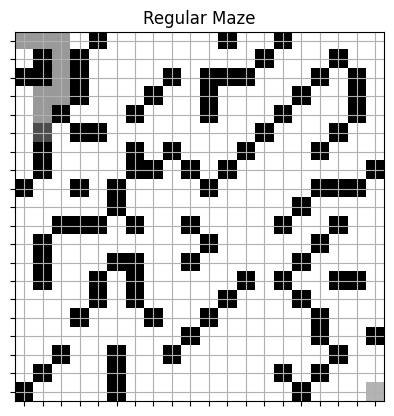

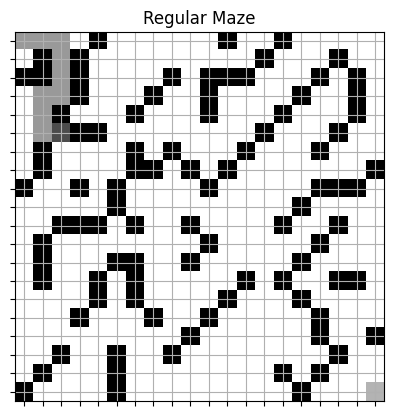

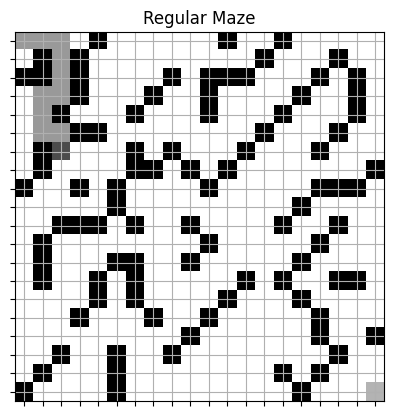

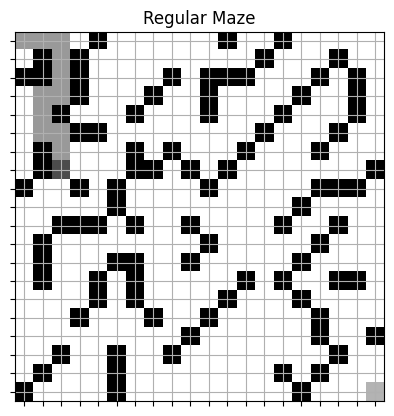

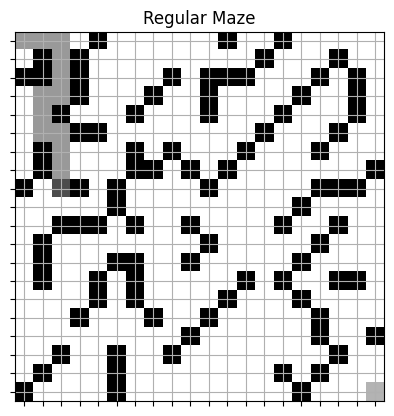

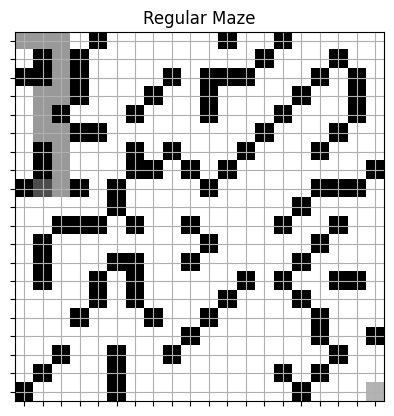

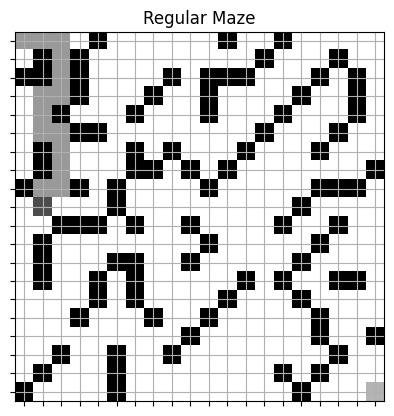

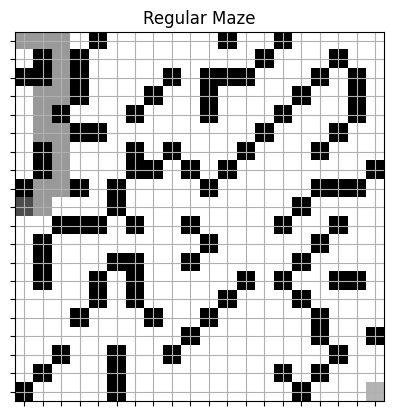

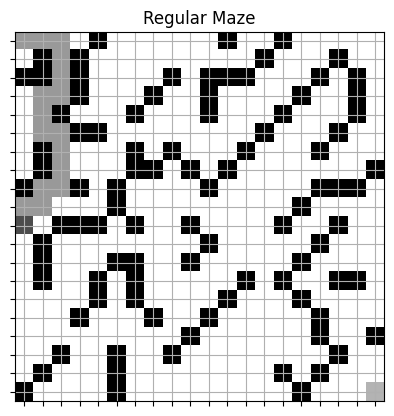

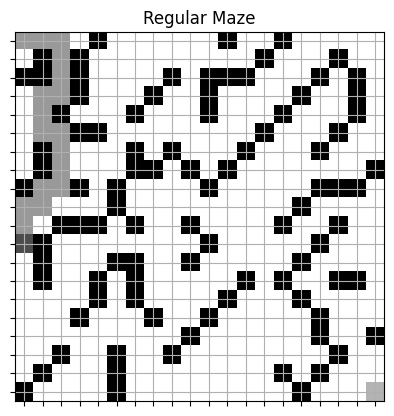

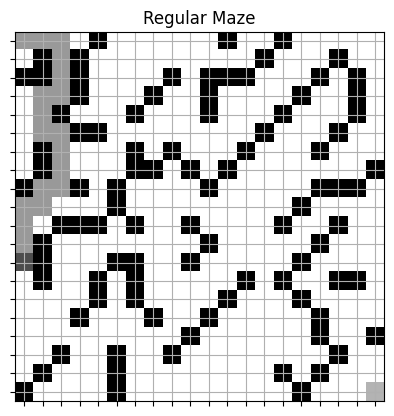

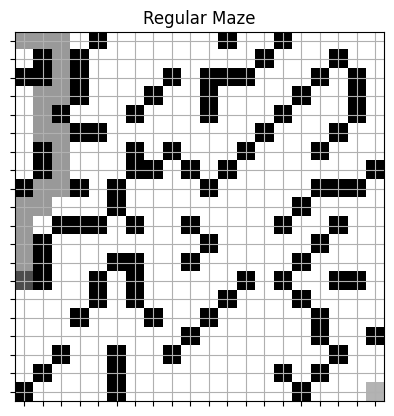

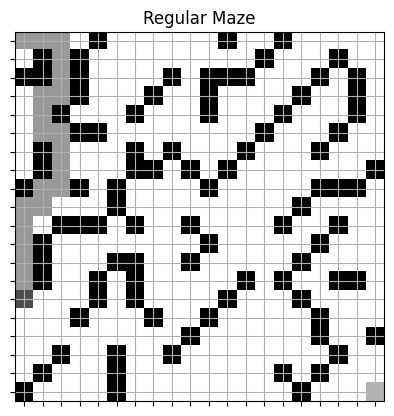

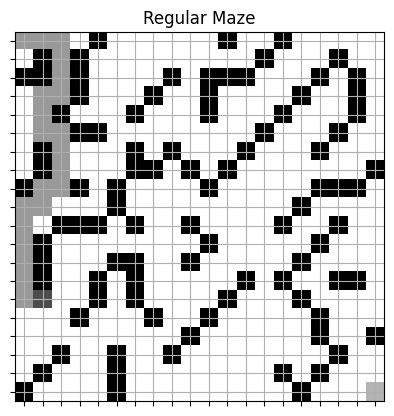

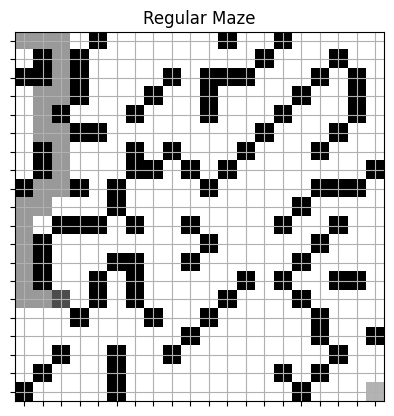

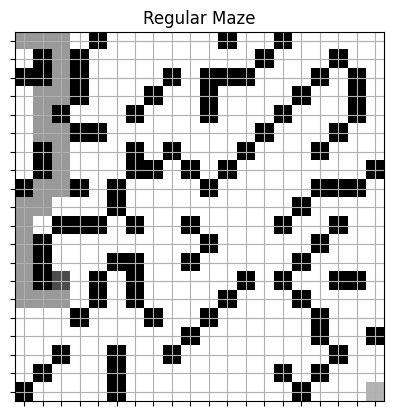

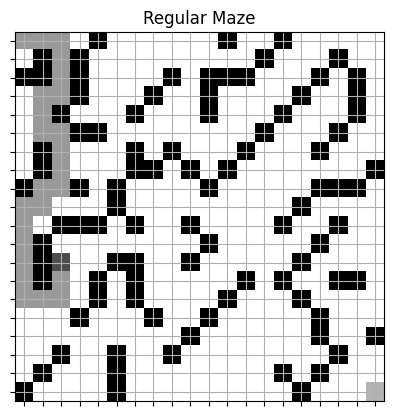

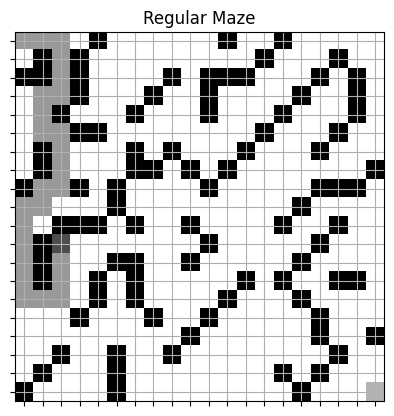

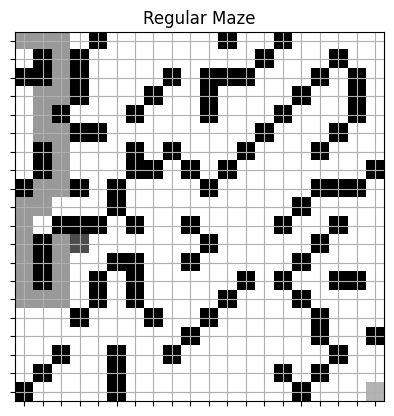

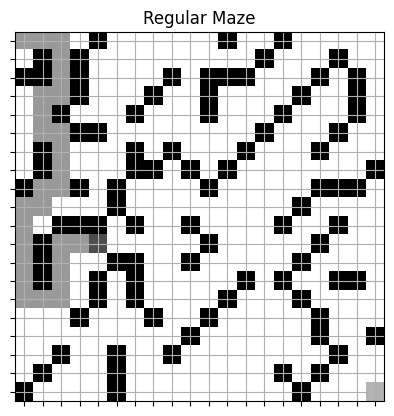

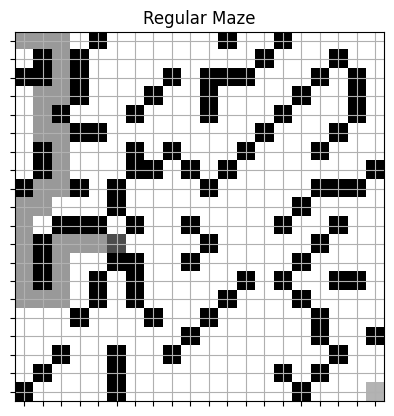

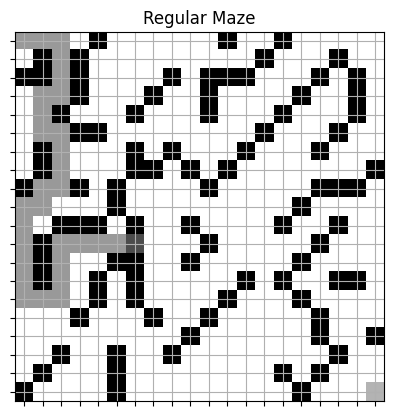

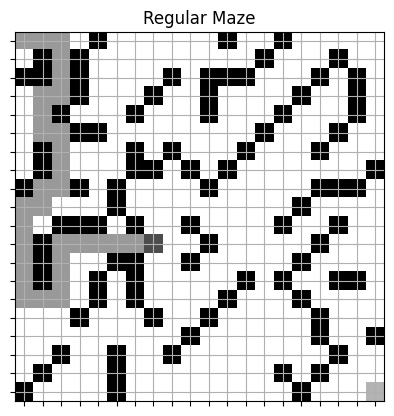

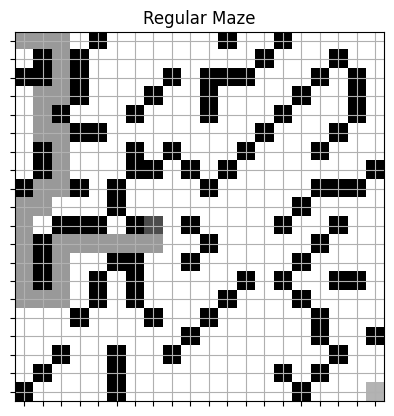

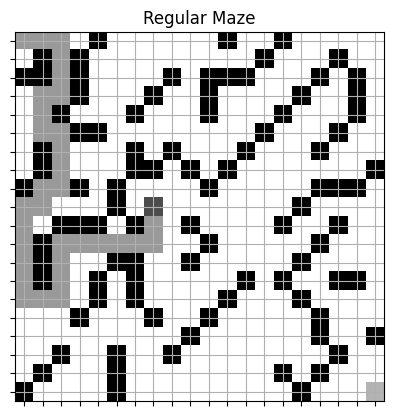

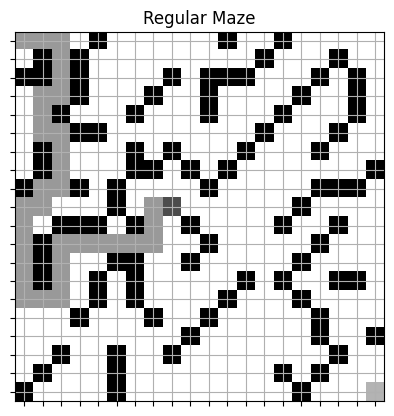

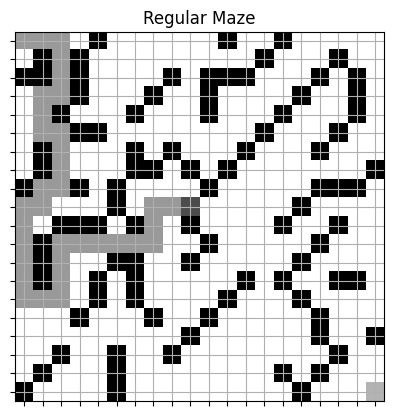

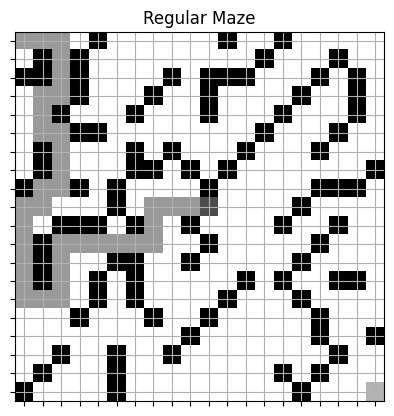

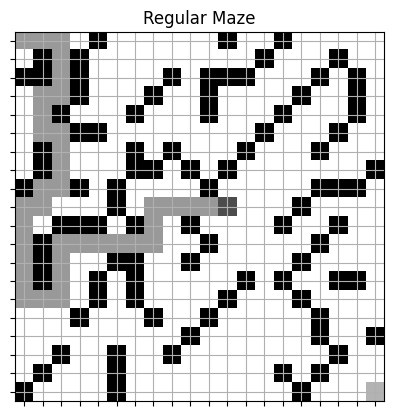

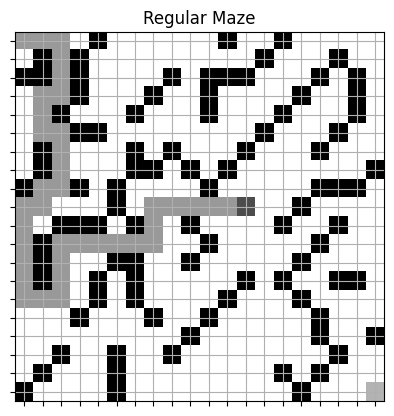

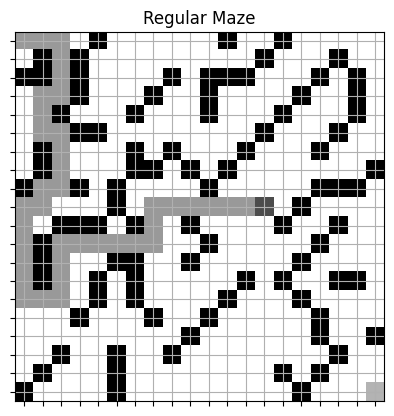

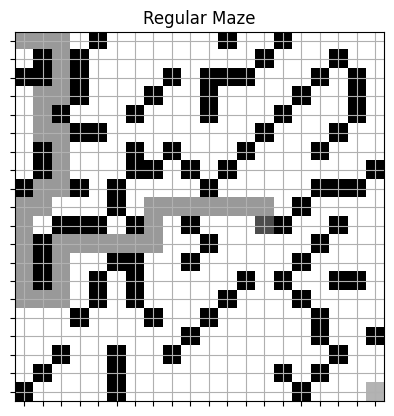

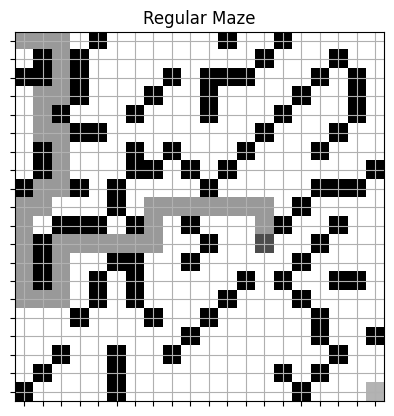

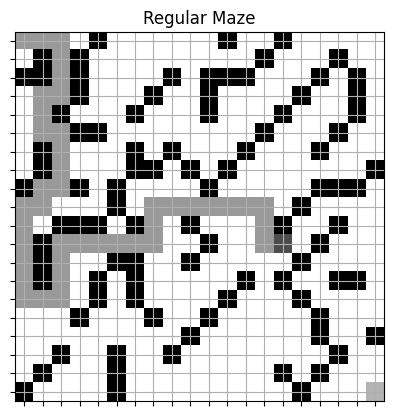

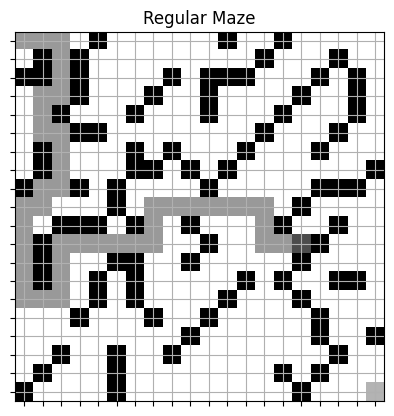

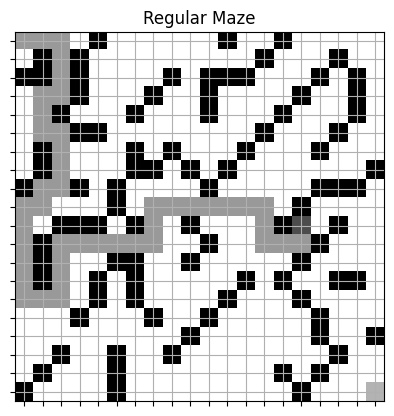

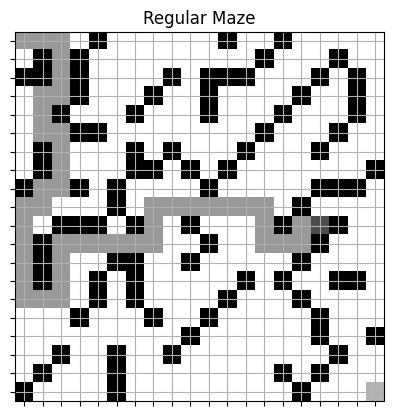

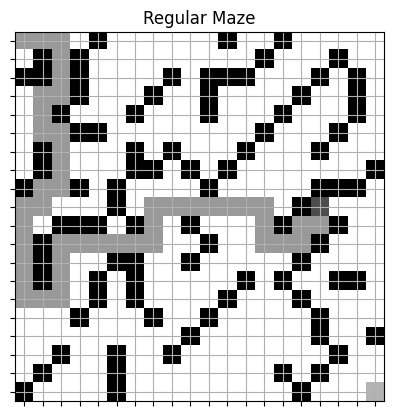

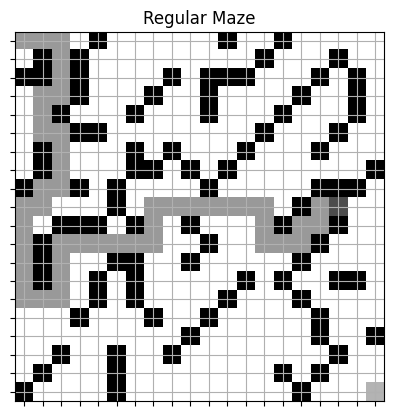

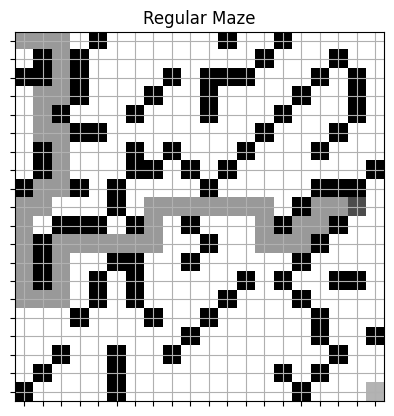

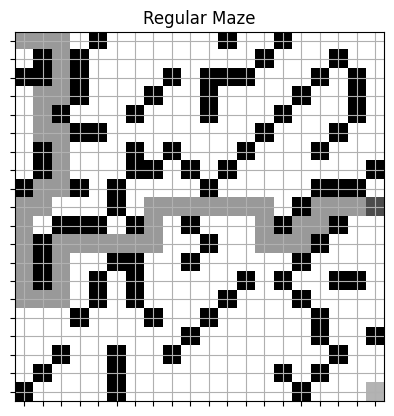

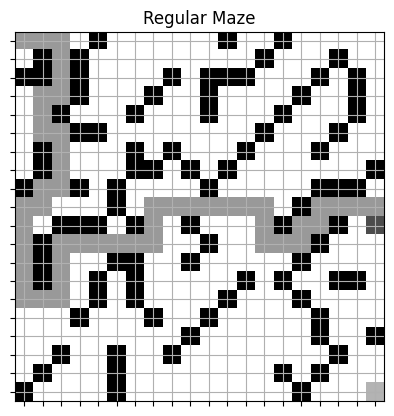

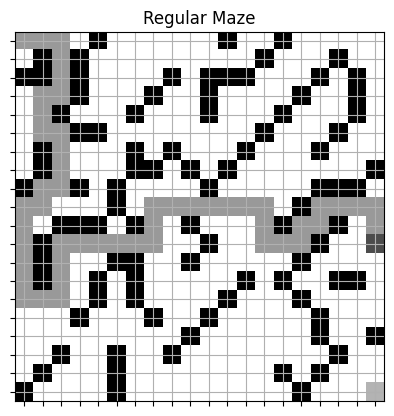

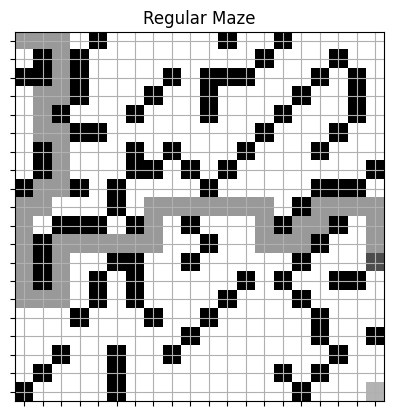

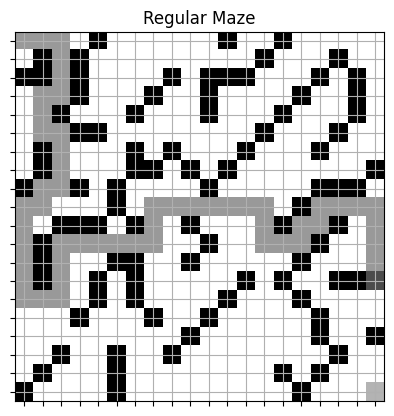

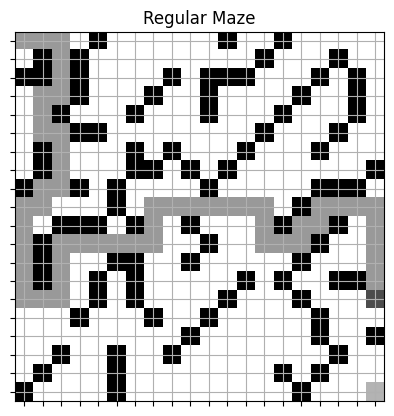

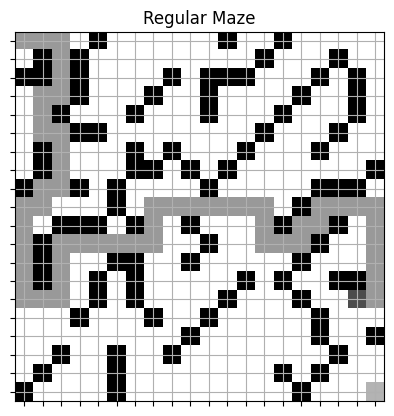

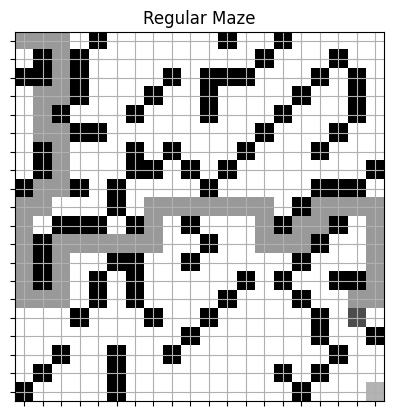

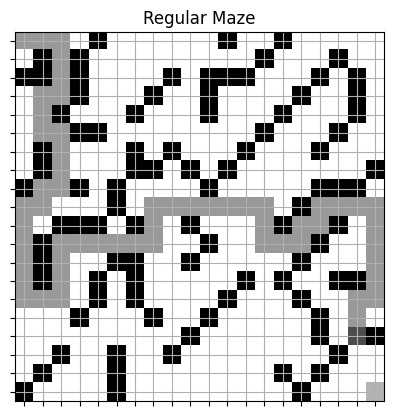

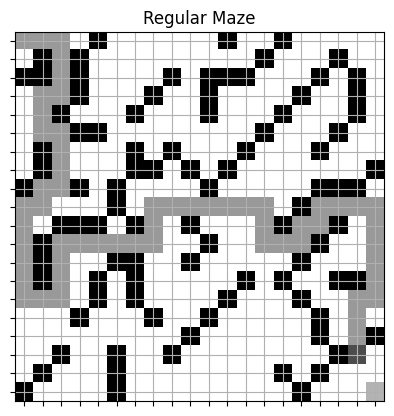

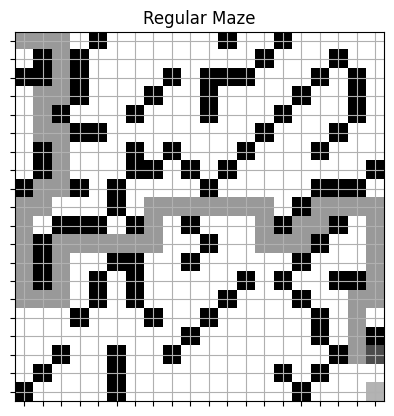

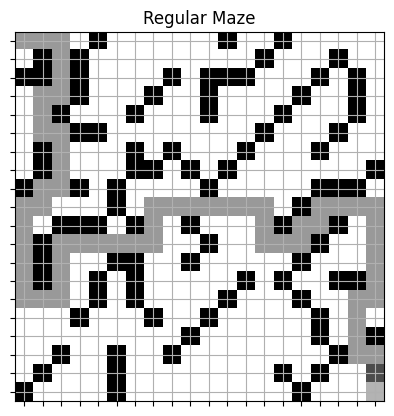

Win!


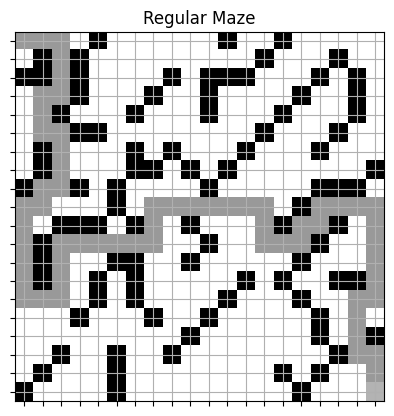

Final score:  4.100000000000005


In [2]:
#importamos las librerias
import math #funciones matemáticas
import random #se utiliza para generar números aleatorios
import numpy as np #para operaciones numéricas en Python
import matplotlib
import matplotlib.pyplot as plt
from tkinter import * #Proporciona herramientas para crear ventanas, cuadros de diálogo y otros elementos gráficos


blocked = 0.0 #color area bloqueada
player = 0.3 #color del jugador
goal = 0.9 #color de la meta

#Parámetros del Qlearning
epsilon = 0.7 #Controla la probabilidad de tomar una acción aleatoria en lugar de la mejor acción conocida.
learning_rate = 0.7 #Tasa de aprendizaje para actualizar los valores de Q.
discount = 0.9 #Factor de descuento que modela la importancia relativa de las recompensas futuras.

dif_actions = [0,1,2,3] #Lista que representa las acciones posibles en el entorno.
# 1 = Arriba
# 3 = Abajo
# 0 = Izquierda
# 2 = Derecha

class Maze(object):
    def __init__(self, maze, runner = (0,0)): #Define el método de inicialización de la clase, toma tres parámetros.
    #self es una referencia a la instancia de la clase que se está creando.
    #maze se espera que sea una representación del laberinto (posiblemente una matriz).
    #runner es una tupla que representa la posición inicial del corredor en el laberinto.
        self._maze = np.array(maze) #Crea una variable de instancia.
        x,y = self._maze.shape #Obtiene las dimensiones (número de filas y columnas) del laberinto.
        self.goal = (x-1,y-1) #Establece el atributo goalde la instancia actual con una tupla que representa la posición de la meta en el laberinto
        self.restart(runner) #Este método se espera que reinicie el laberinto con una nueva posición para el corredor (inicialmente configurado en (0, 0)).


     #reinicia el laberinto
    def restart(self, runner):
        self.maze = np.copy(self._maze) #Esta copia se utilizará para realizar modificaciones sin afectar el laberinto original.
        self.visited_square = set() #Este conjunto se utilizará para almacenar las coordenadas de las casillas que ha visitado el corredor durante su movimiento.
        reset_x,reset_y = self._maze.shape #Obtiene las dimensiones originales del laberinto ( self._maze) y las almacena en las variables reset_xy reset_y.
        self.runner = runner #Almacena la posición inicial del corredor ( runner) en la variable de instancia self.runner.
        runner_xcor, runner_ycor = runner #Desempaqueta las coordenadas del corredor
        self._maze[runner_xcor,runner_ycor] = player #Modifica la posición del corredor en el laberinto original
        self.state = (runner_xcor, runner_ycor, 'start') #Establece el estado del laberinto ( self.state) como una tupla que contiene las coordenadas del corredor y el estado, que se establece como 'start'.
        self.min_reward = -.3 * (reset_x*reset_y) #Calcula y establece el valor mínimo de recompensa
        self.final_reward = 0 #Esta variable se utiliza para realizar un seguimiento de la recompensa total acumulada durante la ejecución del corredor en el laberinto.


    #hace el movimiento
    def change_state(self, move): #ser responsable de actualizar el estado del corredor en el laberinto según una acción específica ( move).
        # xcor, ycor = self._maze.shape
        new_xcor,new_ycor, new_mode = runner_xcor, runner_ycor, mode = self.state #Desempaqueta las coordenadas y el modo del estado actual del corredor ( self.state) en las variables new_xcor, new_ycor, y new_mode.
        if self.maze[runner_xcor, runner_ycor] > 0.0: #Verifica si la posición actual del corredor en el laberinto tiene un valor mayor que 0.0
            self.visited_square.add((runner_xcor, runner_ycor)) #Si es así, significa que el corredor ha ingresado a una posición que no es un obstáculo y, por lo tanto, agrega esta posición al conjunto de visited_square.

        is_valid = self.check_move() #Llama al método check_move()para obtener las acciones válidas que el corredor puede realizar desde su posición actual.

        if not is_valid:
            new_mode = 'barrier' #el corredor ha encontrado un obstáculo.
        elif move in is_valid:
            new_mode = 'running' #Si es válido, actualiza 'new_mode' a 'running'y actualiza las coordenadas del corredor ( new_xcory new_ycor) según la acción tomada.
            if move == 0: #izquierda
                new_ycor-=1
            elif move == 1: #arriba
                new_xcor -=1
            if move == 2: #derecha
                new_ycor +=1
            elif move == 3: #abajo
                new_xcor+=1
        else:
            new_mode = 'stop' #Si la acción no es válida, establece 'new_mode' en 'stop'.

        self.state = (new_xcor,new_ycor, new_mode) #Actualiza el estado del corredor ( self.state) con las nuevas coordenadas y el nuevo modo.


    #hace la accion
    def moves(self, decision): #responsable de coordinar el movimiento del corredor en el laberinto
        self.change_state(decision) #Llama al método change_state(decision)para actualizar el estado del corredor en el laberinto según la decisión tomada ( decision).
        score = self.reward() #Llama al método reward()para obtener la puntuación asociada con el movimiento realizado por el corredor.
        self.final_reward += score #Esta variable se utiliza para realizar un seguimiento de la recompensa total acumulada durante la ejecución del corredor en el laberinto.
        check_is_over = self.is_over() #Llama al método is_over()para verificar si el juego ha terminado (si el corredor ha alcanzado la meta o ha perdido).
        return score, check_is_over #Retorna la puntuación obtenida ( score) y un indicador ( check_is_over) que informa sobre el estado del juego (si ha terminado o no).

    #obtiene recompenza
    def reward(self): #asigna una recompensa al corredor en función de su estado actual y su posición en el laberinto
        runner_xcor, runner_ycor, mode = self.state #Desempaqueta las coordenadas del corredor y su modo actual desde el estado del laberinto ( self.state) en las variables runner_xcor, runner_ycor, y mode.
        new_xcor,new_ycor = self._maze.shape #Obtiene las dimensiones del laberinto ( self._maze.shape) y las almacena en las variables new_xcory new_ycor
        if (runner_xcor,runner_ycor) == self.goal: #Verifique si la posición actual del corredor coincide con la posición de la meta (self.goal).
            return 10.00 #Si es así, devuelve una recompensa positiva de 10.00
        if mode == 'barrier': #Verifica si el modo actual del corredor es 'barrier'(indicando que ha chocado con un obstáculo).
            return self.min_reward -0.50 #Si es así, devuelve una recompensa calculada restando una penalización ( 0.50) del valor mínimo de recompensa ( self.min_reward).
        if mode == 'running': #Verifique si el modo actual del corredor es 'running'(indicando que se está moviendo).
            return -0.1 #Si es así, devuelve una penalización de -0.1.
        if mode == 'stop': #Verifique si el modo actual del corredor es 'stop'(indicando que se ha detenido).
            return -0.25 #Si es así, devuelve una penalización de -0.25.
        if (runner_xcor, runner_ycor) in self.visited_square: #Verifique si la posición actual del corredor ya ha sido visitada antes (registrada en self.visited_square).
            return -0.20 #Si es así, devuelve una penalización de -0.20.

    #comprueba el estado del juego
    def is_over(self): #determina si el juego ha terminado y devuelve un estado que indica el resultado del juego
        if self.final_reward < self.min_reward: #Verifica si la recompensa total final ( self.final_reward) es menor que la recompensa mínima permitida ( self.min_reward).
            return 'Lost' #Si es así, devuelve 'Lost', indicando que el corredor ha perdido el juego.
        runner_xcor,runner_ycor, mode = self.state #Desempaqueta las coordenadas del corredor y su modo actual desde el estado del laberinto ( self.state) en las variables runner_xcor, runner_ycory mode.
        if (runner_xcor,runner_ycor) == self.goal: #Verifique si la posición actual del corredor coincide con la posición de la meta ( self.goal).
            return 'Winner' #Si es así, devuelve 'Winner', indicando que el corredor ha alcanzado la meta y ha ganado el juego.
        return 'Playing' #Si no se cumple ninguna de las condiciones anteriores, devuelve 'Playing', indicando que el juego aún está en curso.

    def check_move(self,cell = NONE): #determina las acciones válidas (movimientos permitidos) para el corredor en función de su posición actual en el laberinto
          # si no se pasa ninguna posición, tome la posición del estado del mouse
        if cell is NONE: #Verifica si no se ha pasado ninguna posición específica ( cell). Si no se ha proporcionado una posición, la función toma las coordenadas del corredor desde el estado actual del laberinto ( self.state).
            cur_xcor, cur_ycor, mode = self.state #Si no se ha proporcionado una posición ( cell), desempaqueta las coordenadas del corredor y su modo actual desde el estado del laberinto en las variables cur_xcor, cur_ycory mode.
         # toma la posición pasada
        else:
            cur_xcor, cur_ycor = cell

        valid_actions = [0,1,2,3] #Inicializa una lista de acciones válidas con los valores [0, 1, 2, 3]
        #arriba, abajo, izquierda, derecha
        x_axis, y_axis = self._maze.shape #Obtiene las dimensiones del laberinto ( self._maze.shape) y las almacena en las variables x_axisy y_axis.

        if cur_xcor == 0: #Verifica si el corredor está en el borde superior del laberinto
            valid_actions.remove(1) #En caso afirmativo, elimine la acción de moverse hacia arriba ( 1) de la lista de acciones válidas.
        elif cur_xcor == x_axis-1: #Verifica si el corredor está en el borde inferior del laberinto
            valid_actions.remove(3) #En caso afirmativo, elimine la acción de moverse hacia abajo ( 3) de la lista de acciones válidas.
        if cur_ycor == 0: #Verifique si el corredor está en el borde izquierdo del laberinto.
            valid_actions.remove(0) #Si es así, elimine la acción correspondiente a moverse hacia la izquierda ( valid_actions.remove(0)).
        elif cur_ycor == y_axis - 1: #Verifique si el corredor está en el borde derecho del laberinto.
            valid_actions.remove(2) #Si es así, elimine la acción correspondiente a moverse hacia la derecha ( valid_actions.remove(2)).

        if cur_xcor > 0 and self._maze[cur_xcor-1, cur_ycor] == 0.0: #Verifique si el corredor puede moverse hacia arriba y si la celda en esa dirección está libre de obstáculos (valor 0.0).
            valid_actions.remove(1) #Si es así, elimine la acción correspondiente a moverse hacia arriba ( valid_actions.remove(1)).
        if cur_xcor < x_axis-1 and self._maze[cur_xcor+1, cur_ycor] == 0.0: #Verifique si el corredor puede moverse hacia abajo y si la celda en esa dirección está libre de obstáculos.
            valid_actions.remove(3) #Si es así, elimine la acción correspondiente a moverse hacia abajo ( valid_actions.remove(3)).
        if cur_ycor > 0 and self._maze[cur_xcor, cur_ycor-1] == 0.0: #Verifique si el corredor puede moverse hacia la izquierda y si la celda en esa dirección está libre de obstáculos.
            valid_actions.remove(0) #Si es así, elimine la acción correspondiente a moverse hacia la izquierda ( valid_actions.remove(0)).
        if cur_ycor < y_axis-1 and self._maze[cur_xcor,cur_ycor+1] == 0.0: #Verifique si el corredor puede moverse hacia la derecha y si la celda en esa dirección está libre de obstáculos.
            valid_actions.remove(2) #Si es así, elimine la acción correspondiente a moverse hacia la derecha ( valid_actions.remove(2)).

        return valid_actions #Retorna la lista actualizada de acciones válidas después de haber eliminado las acciones prohibidas según la posición del corredor y los límites del laberinto.





maze =[ #laberinto
[ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., 1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
[ 1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
[ 0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1., 0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.],
[ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1., 0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.],
[ 1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1., 0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.],
[ 1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
[ 1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1., 1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
[ 1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0., 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
[ 0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1., 0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.],
[ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1., 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
[ 1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0., 1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.],
[ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
[ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0., 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
[ 1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1., 1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.],
[ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1., 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
[ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1., 0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0., 1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.],
[ 1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.],
[ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1., 1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.],
[ 0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1., 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.]
]


def create_maze(maze): #grafico del juego
    plt.grid('on')
    x,y = maze._maze.shape
    #fig= plt.subplots()
    axis = plt.gca()
    #im = axis.imshow(maze)
    axis.set_xticks(np.arange(x))
    axis.set_yticks(np.arange(y))
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    pic = np.copy(maze._maze)
    #print(x,y)
    for row,col in maze.visited_square:
        pic[row,col] = 0.6
    runner_xcor, runner_ycor, runner_mode = maze.state
    pic[runner_xcor, runner_ycor] = 0.3   #runner
    pic[x-1, y-1] = 0.7 # finish line

    axis.set_title("Regular Maze")

    img = plt.imshow(pic,interpolation='none',cmap = 'gray')
    #fig.tight_layout()
    #plt.show()
    plt.ion()
    plt.pause(0.25)
    plt.show()
    return img

##########################################################################################




##########################################################################################
table_rows = 20
table_cols = 20
##
##q_vals = np.zeros((table_rows, table_cols, 4))


#def create_qtable_and_rewards(maze):
q_vals = np.zeros((table_rows, table_cols,4))

##def remember(self, episode):
##    memory = list()
##    max_mem = 100
##    # episode = [envstate, action, reward, envstate_next, game_over]
##    # memory[i] = episode
##    # envstate == flattened 1d maze cells info, including rat cell (see method: observe)
##    memory.append(episode)
##    if len(memory) > max_memory:
##        del memory[0]

#
def updateQ(old_x, old_y, new_x, new_y, action, reward): #actualiza el valor de la función Q para un par estado-acción específica en el arreglo q_vals
    old_q_val = q_vals[old_x, old_y, action] #Obtiene el valor actual de la función Q para el par estado-acción actual.
    temp = reward + (discount * np.max(q_vals[new_x, new_y])) - old_q_val #Calcula la diferencia temporal de la recompensa. Obtiene el valor máximo de la función Q para todas las acciones posibles en el nuevo estado
    new_q_val = old_q_val + (learning_rate * temp) #ctualiza el valor de la función Q utilizando la fórmula de actualización de Q-learning.
    q_vals[old_x, old_y, action] = new_q_val #Actualiza el valor de la función Q en el arreglo q_valscon el nuevo valor calculado.



def train_(maze):
    win_count=0
    epoch_amount=4500
    episode_moves=0


    #experience = Experience(maze, max_memory=max_memory)

    for epoch in range(epoch_amount): #determina la próxima acción que el agente tomará durante un episodio de entrenamiento utilizando la política actual y la función Q actualizada.
        #for episode in range(game_amount):

        #if you want random start
        #runner_cell = random.choice(maze.empty)
        #maze.restart(runner_cell)
        runner_cell = (0, 0)
        maze.restart(runner_cell)
        game_over = False

        # get initial envstate (1d flattened canvas)
        #envstate = maze.check_state()

    # n_episodes = 0
        while not game_over:
            #valid_actions = maze.check_move()
            #if not valid_actions: break
            #prev_envstate = envstate
            action = get_next_action(maze, q_vals)

            old_x, old_y, mode = maze.state
            # Apply action, get reward and new envstate
            reward, game_status = maze.moves(action)
            if game_status == 'Winner':
                win_count=win_count+1
                game_over = True
            elif game_status == 'Lost':
                game_over = True
            else:
                game_over = False

            new_x, new_y, mode = maze.state
            updateQ(old_x, old_y, new_x, new_y, action, reward)

        print("Training Cycle: ",epoch+1,"/",epoch_amount)




def get_next_action(maze, q_vals):

    # Obtener la siguiente acción
    if np.random.rand() > epsilon:
        valid_actions = maze.check_move()
        action = random.choice(valid_actions)

    else:
        cur_x, cur_y, mode = maze.state
        action = np.argmax(q_vals[cur_x, cur_y])
    return action


def get_shortest_path(maze): #inicia el proceso de entrenamiento del agente antes de calcular la ruta más corta en el entorno del juego.
    train_(maze)
    #maze = Maze(maze)
    runner_cell = (0, 0)
    maze.restart(runner_cell)
    game_over = False

    total_reward = 0;
    #envstate = maze.check_state()
    #_moves =0

# n_episodes = 0
    while not game_over: #inicia un bucle whileque se ejecuta mientras la condición not game_oversea verdadera
        valid_actions = maze.check_move() #Obtiene las acciones válidas que el agente puede tomar en su estado actual del entorno.
        if not valid_actions: break #Si no hay acciones válidas, se rompe el bucle, saliendo del bucle while.
        #prev_envstate = envstate
        cur_x, cur_y, mode = maze.state #Se obtienen las coordenadas actuales del agente en el entorno del juego.
        action = np.argmax(q_vals[cur_x, cur_y]) #Se elige la acción que maximiza el valor de la función Q para las coordenadas actuales del agente.

        # Apply action, get reward and new envstate
        reward, game_status = maze.moves(action) #Se aplica la acción, se obtiene la recompensa y se actualiza el estado del juego.
        #print("Reward: ", reward, "Total: ", total_reward)
        total_reward = total_reward + reward #Se actualiza el puntaje total acumulado.
        if game_status == 'Winner': #Se verifica si el juego ha terminado con una victoria o una derrota, y se imprime un mensaje correspondiente.
            print("Win!")
            game_over = True
        elif game_status == 'Lost': #Si el juego no ha terminado, se establece game_overen False, y el bucle continúa ejecutándose.
            print("Loser!")
            game_over = True
        else:
            game_over = False

        #_moves=_moves+1
        create_maze(maze) #Se crea y muestra una representación visual del entorno del juego después de cada paso del agente.

    #create_maze(maze)
    #print("Steps: ", _moves)

    print("Final score: ",total_reward)

maze = Maze(maze)
get_shortest_path(maze)